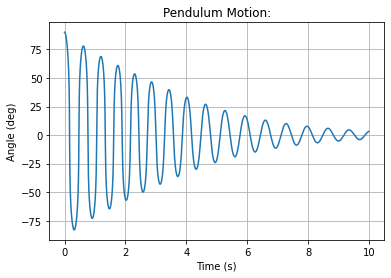

In [42]:
import numpy as np 
import matplotlib.pyplot as plt 

def accel_x (thetadot, xdot, theta):
    return (2*F+2*F*l**2*m-2*b*xdot-2*b*l**2*m*xdot+2*l**3*m**2*thetadot**2*np.sin(theta)+2*l*m*thetadot**2*np.sin(theta)+g*l**2*m**2*np.sin(2*theta))/(2*M+l**2*m**2+2*M*l**2*m+2*m-l**2*m**2*np.cos(2*theta))*mint

def accel_theta (thetadot, xdot, theta):
    return (-2*F*l*m*np.cos(theta)+2*b*l*m*xdot*np.cos(theta)-2*g*l*m**2*np.sin(theta)-2*M*g*l*m*np.sin(theta)-l**2*m**2*thetadot**2*np.sin(2*theta))/(2*M+l**2*m**2+2*M*l**2*m+2*m-l**2*m**2*np.cos(2*theta))*mint

# Crane Specification
F = 0
M = 5
b = 1

#pendulum_specification
m = 3.0
g = 9.8
mint = 12.0
l = 2.0
initial_angle = 90.0

# Time Step
initial_step = 0
h = 0.0001
final_step = 10.0
t = np.arange(initial_step, final_step, h)
n = len(t) 

# theta punya
y=np.zeros(n)
y_v=np.zeros(n)
y[0] = np.radians(initial_angle) 
y_v[0] = np.radians(0.0)

# crane punya
x=np.zeros(n)
x_v=np.zeros(n)
x[0] = 0 
x_v[0] = 0

for i in range(0, n-1): 
    k1y = h*y_v[i]
    k1vy = h*accel_theta(y_v[i], x_v[i], y[i])

    k1x = h*x_v[i]
    k1vx = h*accel_x(y_v[i], x_v[i], y[i])

    k2y = h*(y_v[i]+0.5*k1vy)
    k2vy = h*accel_theta(y_v[i]+0.5*k1vy, x_v[i]+0.5*k1vx, y[i]+0.5*k1y)
    
    k2x = h*(x_v[i]+0.5*k1vx)
    k2vx = h*accel_x(y_v[i]+0.5*k1vy, x_v[i]+0.5*k1vx, y[i]+0.5*k1y)

    k3y = h*(y_v[i]+0.5*k2vy)
    k3vy = h*accel_theta(y_v[i]+0.5*k2vy, x_v[i]+0.5*k2vx, y[i]+0.5*k2y)
    
    k3x = h*(x_v[i]+0.5*k2vx)
    k3vx = h*accel_x(y_v[i]+0.5*k2vy, x_v[i]+0.5*k2vx, y[i]+0.5*k2y)

    k4y = h*(y_v[i]+k3vy)
    k4vy = h*accel_theta(y_v[i]+k3vy, x_v[i]+k3vx, y[i]+k3y)
    
    k4x = h*(x_v[i]+k3vx)
    k4vx = h*accel_x(y_v[i]+k3vy, x_v[i]+k3vx, y[i]+k3y)

    # Update next value of y 
    y[i+1] = y[i] + (k1y + 2 * k2y + 2 * k3y + k4y) / 6.0 
    y_v[i+1] = y_v[i] + (k1vy + 2 * k2vy + 2 * k3vy + k4vy) / 6.0

    # Update next value of x
    x[i+1] = x[i] + (k1x + 2 * k2x + 2 * k3x + k4x) / 6.0 
    x_v[i+1] = x_v[i] + (k1vx + 2 * k2vx + 2 * k3vx + k4vx) / 6.0

plt.plot(t, np.degrees(y))
plt.title('Pendulum Motion:')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.grid(True)
plt.show()

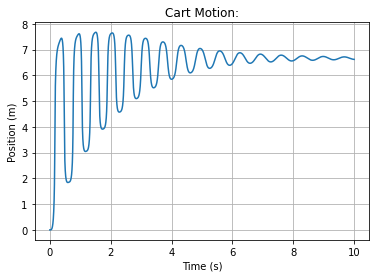

In [43]:
plt.plot(t, x)
plt.title('Cart Motion:')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.show()

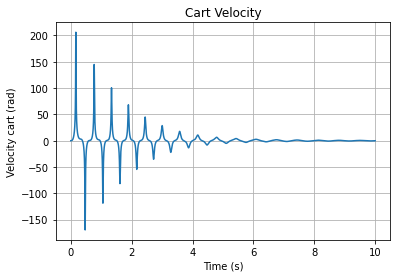

In [44]:
plt.plot(t, x_v)
plt.title('Cart Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity cart (rad)')
plt.grid(True)
plt.show()

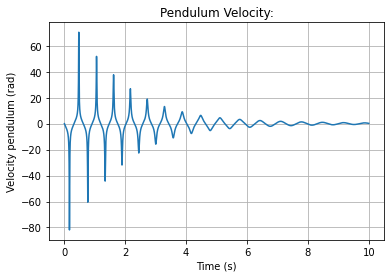

In [45]:
plt.plot(t, y_v)
plt.title('Pendulum Velocity:')
plt.xlabel('Time (s)')
plt.ylabel('Velocity pendulum (rad)')
plt.grid(True)
plt.show()

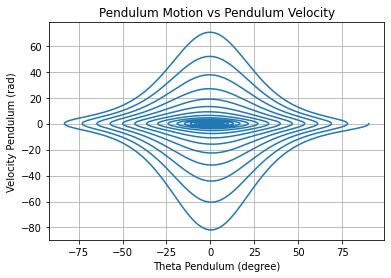

In [46]:
plt.plot(np.degrees(y), y_v)
plt.title('Pendulum Motion vs Pendulum Velocity')
plt.xlabel('Theta Pendulum (degree)')
plt.ylabel('Velocity Pendulum (rad)')
plt.grid(True)
plt.show()

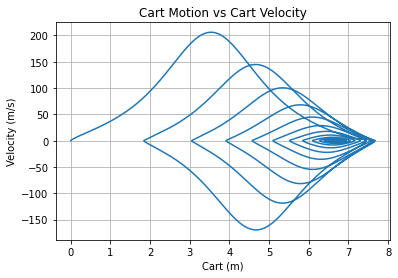

In [47]:
plt.plot(x, x_v)
plt.title('Cart Motion vs Cart Velocity')
plt.xlabel('Cart (m)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.show()